# Predicting Blood Glucose levels for Type 1 Diabetes with Recurrent Neural Networks

The concentration of glucose in the blood fluctuates for everyone throughout the day in response to different stimuli, such as eating carbohydrates and exercise. This level is primarily maintained by insulin secreted by the pancreas. As glucose in the blood rises, the pancreas responds by increasing the concentration of insulin in step with this, and as such brings the blood glucose levels to within a homeostatic medium.

For a person with Type 1 Diabetes, the pancreas is not able perform this function and glucose levels have no means of self-regulation through the body's automatic secretion of insulin. As such, Type 1 Diabetics need to manually administer their insulin through insulin injections or electronic insulin pumps to keep their glucose concentration within a healthy interval. In order for a Type 1 Diabetic to administer the optimal level of insulin in response to their glucose levels, they take a reading of their blood glucose beforehand. They will then quantify the expected carbohydrates they intend to consume and then administer a specific insulin amount themselves. 

Within the last 10 years, a sizeable percentage of Type 1 Diabetics now use sensors that provide glucose readings in regular intervals. This can be used for taking glucose measurements automatically, and not having to rely on individual finger-prick tests each time. 




# Recurrent Neural Networks

Recurrent Neural Networks (RNNs) are a class of neural networks that are particularly suited for sequential data processing, making them ideal for applications in time series forecasting. The key feature of RNNs is their ability to maintain a 'memory' of previous inputs by incorporating feedback loops in their architecture. This allows them to capture temporal dependencies and patterns in time series data, which is crucial for accurate forecasting.

Time series forecasting involves predicting future values of a sequence based on its past values. RNNs are well-suited for this task due to their ability to process sequences and maintain state across time steps. Blood glucose levels exhibit temporal patterns and dependencies, such as postprandial spikes (after eating) and circadian variations. RNNs are adept at capturing these patterns due to their sequential processing nature and memory of past inputs, making them suitable for modeling glucose dynamics. The use of Continuous Glucose Monitoring (CGM) systems generates a continuous stream of glucose data. RNNs are well-suited for real-time analysis of this data, providing timely predictions that can inform immediate management decisions.

Given the challenges of predicting blood glucose levels, advanced variants of RNNs, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), can be employed. These architectures are designed to better handle long-term dependencies and avoid issues like the vanishing gradient problem, making them more effective for predicting complex time series data like blood glucose levels.

# Data pre-processing and feature engineering

The dataset comprises of glucose readings from a dexcom G6 sensor in units of mmol/litre at 5 minute intervals over a 3 month period. The dataset is split into training, validation and test data amounting to 70%, 20% and 10% of the total data respectively. 

To pre-prosess the data, all readings above 40mmol/litre are removed in order to remove any outliers impacting training. Null values are also removed and replaced with the previous timestep's glucose value. 

It is important to scale features before training a neural network. The values of glucose readings vary mostly between 2 mmol/litre and 16mmol/litre. These values therefore don't exist in the values less than 1 which are beneficial to learning.  In order to help this, normalisation is a common way of doing this scaling: subtract the mean and divide by the standard deviation of the glucose values. This brings the distributions between -1 and +1 required for training effectively. The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets. 


Glucose readings may vary throughout the day for various reasons. One such reason might be periodical, for example perhaps levels are different while someone is asleep, the morning and the evening. One way to add this is to add a feature to the data that signals the time by vary sinusoidally throughout the day. This could look like:


                            df['Day sin'] = np.sin(timestamp * (2 * np.pi / day))

One way of testing if there is indeed a high periodicity to the dataset is to perform a Fast Fourier Transform (FFT) on the dataset. This will highlight any time frequencies within the data that have a high amplitude and therefore a strong periodicity present that is worth adding this feature for. This was investigated and the plot shown below.


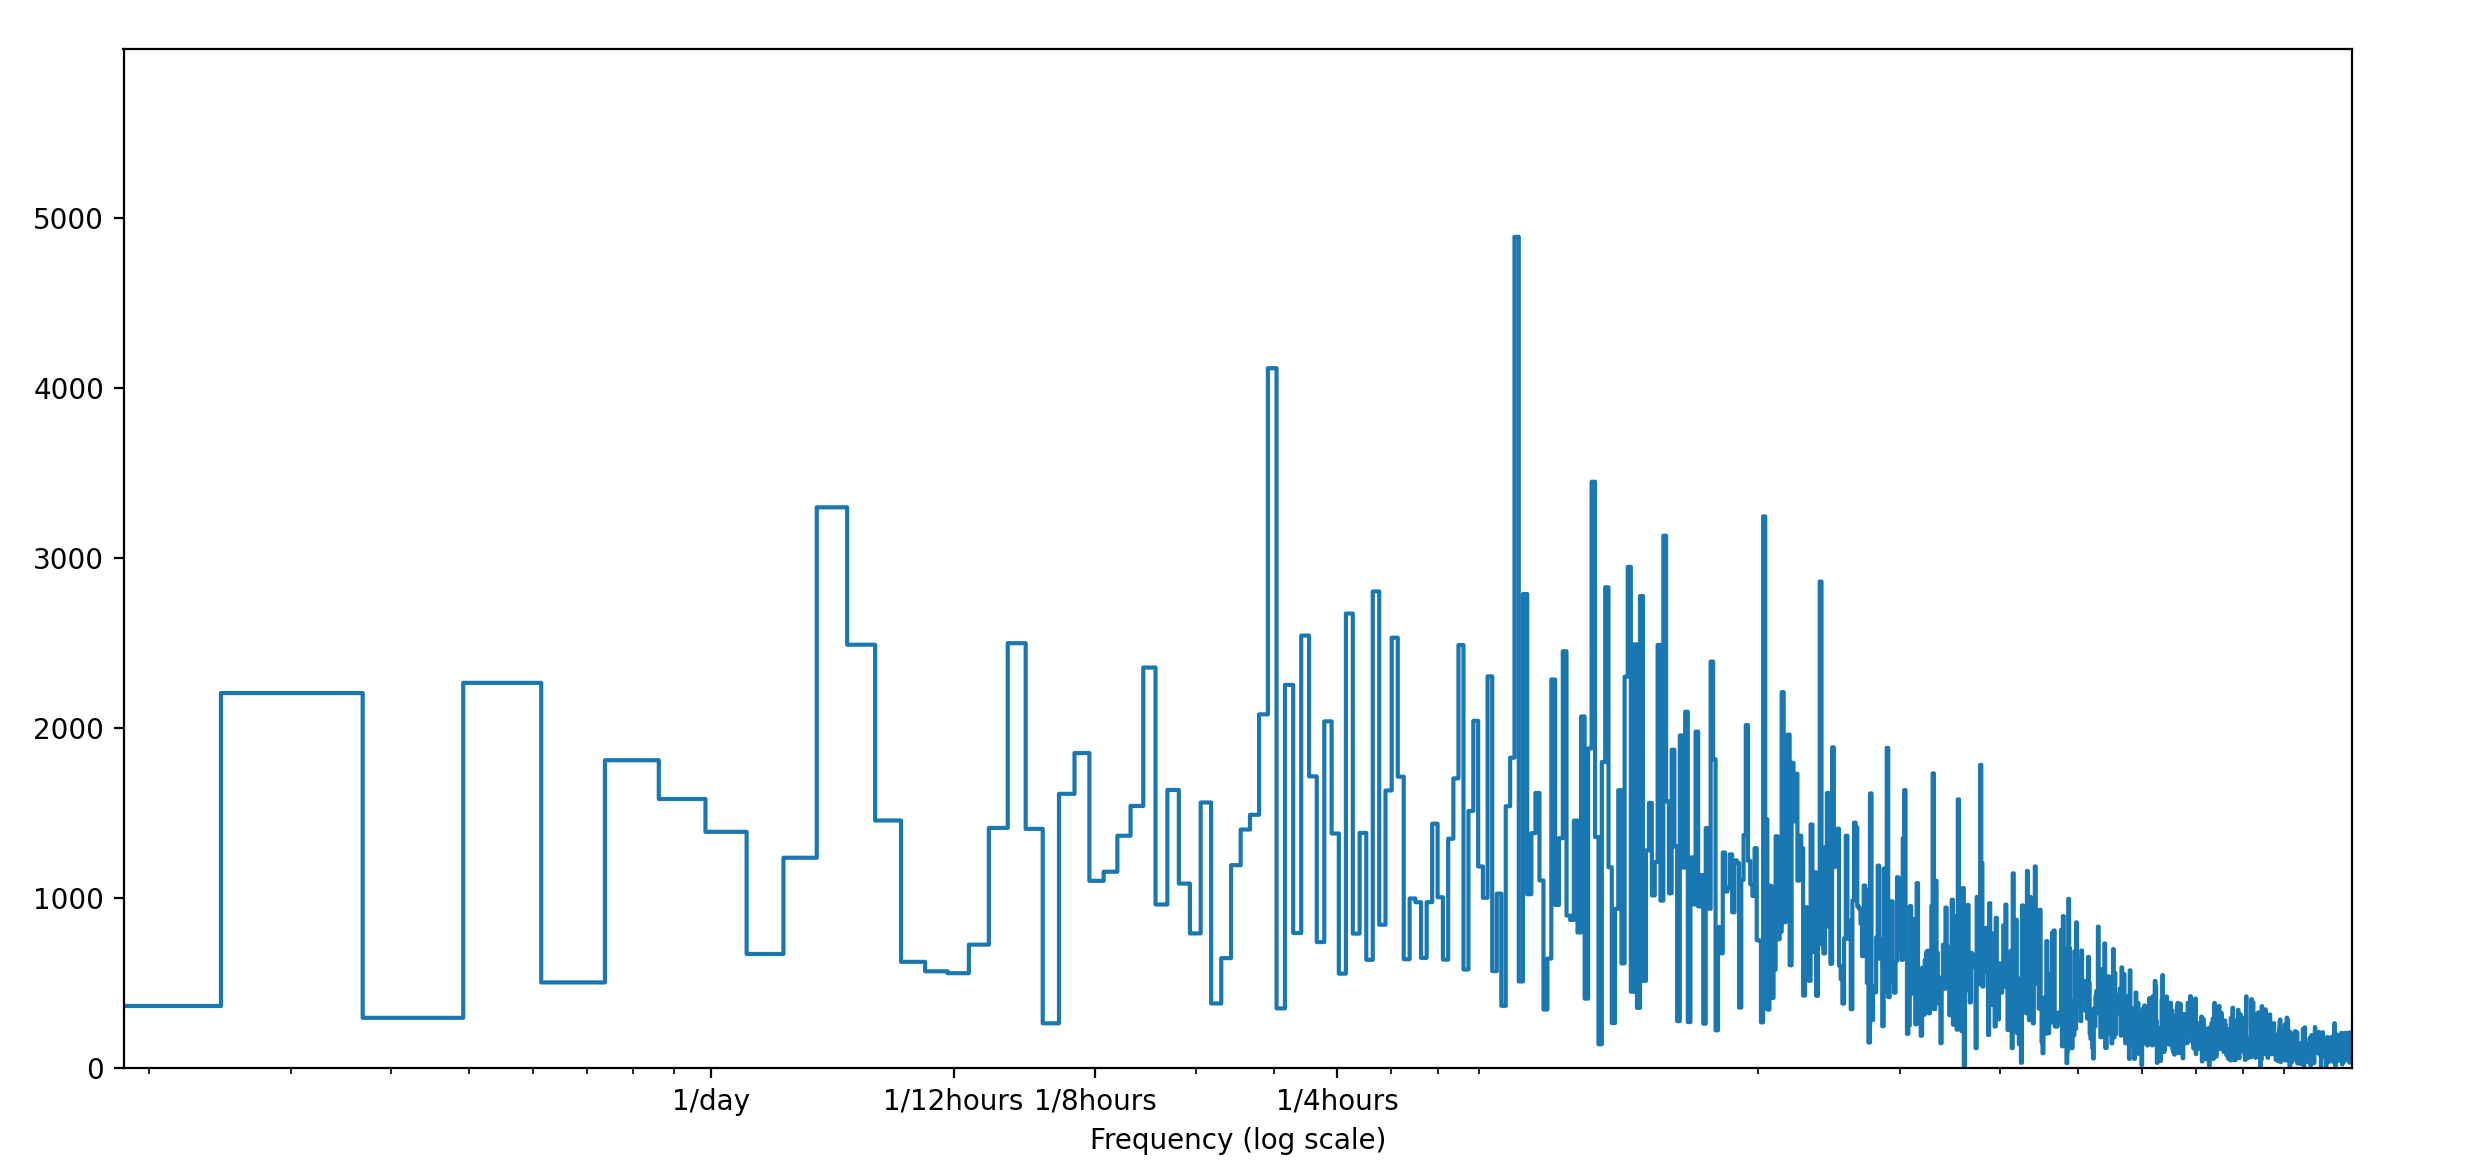

Clearly, there is no clear periodicity greater than 1 hour here. The hypothesis that there exists a periodicity every 8 hours does not hold true and therefore this feature is ommited from the experiment. 




1: Batch size vs MAE
2: Learning rate vs MAE
3: Units vs MAE
4: History used vs MAE
5: GRU, LSTM, RNN vs MAE
6: SGD vs Adam vs RNN vs Last value MAE
7: Future Prediction timesteps vs MAE
8: Graphs of 30min predictions 
9: Final MAE using best method